# Live Selling K-Means Clustering

**About this file**

This dataset has been obtained from UCI ML Repository. https://archive.ics.uci.edu/ml/datasets/Facebook+Live+Sellers+in+Thailand

Live selling is becoming increasingly popular in Asian countries. Small vendors can now reach a wider audience and connect with many customers.

Research Paper: Nassim Dehouche and Apiradee Wongkitrungrueng. Facebook Live as a Direct Selling Channel, 2018, Proceedings of ANZMAC 2018: The 20th Conference of the Australian and New Zealand Marketing Academy. Adelaide (Australia), 3-5 December 2018.

# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv('Live.csv')

# Exploratory data analysis

In [5]:
df.shape

(7050, 16)

In [6]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [8]:
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [9]:
df.drop(['Column1','Column2', 'Column3', 'Column4'], axis=1, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


In [11]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


**There are 3 categorical variables in the dataset. I will explore them one by one.**

In [16]:
df['status_id'].nunique()

6997

In [20]:
df['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [21]:
df['status_type'].nunique()

4

In [22]:
df['status_published'].nunique()

6913

In [23]:
df.drop(['status_id', 'status_published'], axis=1, inplace=True)

In [25]:
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


# Declare feature vector and target variable

In [26]:
X = df

y = df['status_type']

# Convert categorical variable into integers

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
le = LabelEncoder()

In [29]:
X['status_type'] = le.fit_transform(X['status_type'])

In [30]:
y = le.transform(y)

In [31]:
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


# Feature Scaling

In [32]:
cols = X.columns

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
ms = MinMaxScaler()

In [35]:
X = ms.fit_transform(X)

In [36]:
X = pd.DataFrame(X, columns=[cols])

In [37]:
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


# K-Means model with two clusters

In [38]:
from sklearn.cluster import KMeans

In [39]:
kmeans = KMeans(n_clusters=2, random_state=0)

In [40]:
kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

# K-Means model parameters study

In [41]:
kmeans.cluster_centers_

array([[3.28506857e-01, 3.90710874e-02, 7.54854864e-04, 7.53667113e-04,
        3.85438884e-02, 2.17448568e-03, 2.43721364e-03, 1.20039760e-03,
        2.75348016e-03, 1.45313276e-03],
       [9.54921576e-01, 6.46330441e-02, 2.67028654e-02, 2.93171709e-02,
        5.71231462e-02, 4.71007076e-02, 8.18581889e-03, 9.65207685e-03,
        8.04219428e-03, 7.19501847e-03]])

* The KMeans algorithm clusters data by trying to separate samples in n groups of equal variances, minimizing a criterion known as inertia, or within-cluster sum-of-squares Inertia, or the within-cluster sum of squares criterion, can be recognized as a measure of how internally coherent clusters are.

* The k-means algorithm divides a set of N samples X into K disjoint clusters C, each described by the mean j of the samples in the cluster. The means are commonly called the cluster centroids.

* The K-means algorithm aims to choose centroids that minimize the inertia, or within-cluster sum of squared criterion.

**Inertia**

* Inertia is not a normalized metric.

* The lower values of inertia are better and zero is optimal.

* But in very high-dimensional spaces, euclidean distances tend to become inflated (this is an instance of curse of dimensionality).

* Running a dimensionality reduction algorithm such as PCA prior to k-means clustering can alleviate this problem and speed up the computations.

***We can calculate model inertia as follows:-***

In [42]:
kmeans.inertia_

237.7572640441956

# Check quality of weak classification by the model

In [43]:
labels = kmeans.labels_

In [44]:
correct_labels = sum(y==labels)

print('Result: %d out of %d samples are labeled correctly'%(correct_labels, y.size))

Result: 63 out of 7050 samples are labeled correctly


In [45]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.01


# Use elbow method to find optimal number of clusters

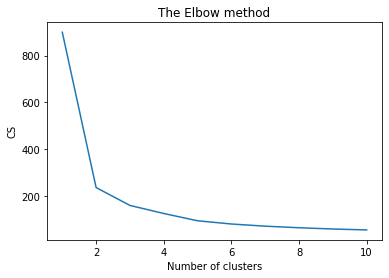

In [46]:
cs = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
    
plt.plot(range(1,11), cs)
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

# K-Means model with different clusters

In [47]:
kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(X)

labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 138 out of 7050 samples were correctly labeled.
Accuracy score: 0.02


In [51]:
kmeans = KMeans(n_clusters=4, random_state=0)

kmeans.fit(X)

labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 4340 out of 7050 samples were correctly labeled.
Accuracy score: 0.62


**We have achieved a relatively high accuracy of 62% with k=4**

# Results and conclusion

* In this project, I have implemented the most popular unsupervised clustering technique called K-Means Clustering.

* I have applied the elbow method and find that k=2 (k is number of clusters) can be considered a good number of cluster to cluster this data.

* I have find that the model has very high inertia of 237.7572. So, this is not a good model fit to the data.

* I have achieved a weak classification accuracy of 1% with k=2 by our unsupervised model.

* So, I have changed the value of k and find relatively higher classification accuracy of 62% with k=4.

* Hence, we can conclude that k=4 being the optimal number of clusters.

# The End